In [111]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Data
df = pd.read_csv("../data/13222067_cleaned.csv")
df.head()



,jenis_kelamin,usia,pendidikan,pekerjaan,penghasilan,domisili,durasi_internet,aktivitas_online_meningkat,aktivitas_online_meningkat_3bln,layanan_aktif_1,...,bayar_online_5,bayar_online_6,bayar_online_7,bayar_online_8,keluhan_online_1,keluhan_online_2,keluhan_online_3,keluhan_online_4,keluhan_online_5,keluhan_online_6
0,Pria,47,SMA,Pekerja Serabutan,Rp 2 juta – Rp 5 juta,bandung,3.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,surabaya,10.0,Ya,Keperluan mengerjakan tugas,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,50,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,jakarta,6.0,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,bandung,5.0,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,28,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,bandung,9.0,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


In [112]:
# Plot theme
# print(plt.style.available)
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('ggplot')
# sns.set(style="white")

# sns.set_style("darkgrid")
# sns.set(color_codes=True)
# sns.color_palette("hls", 8)

sns.set_theme(style="whitegrid")
sns.set_context("poster")

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)
# sinplot()

## DEMOGRAFI

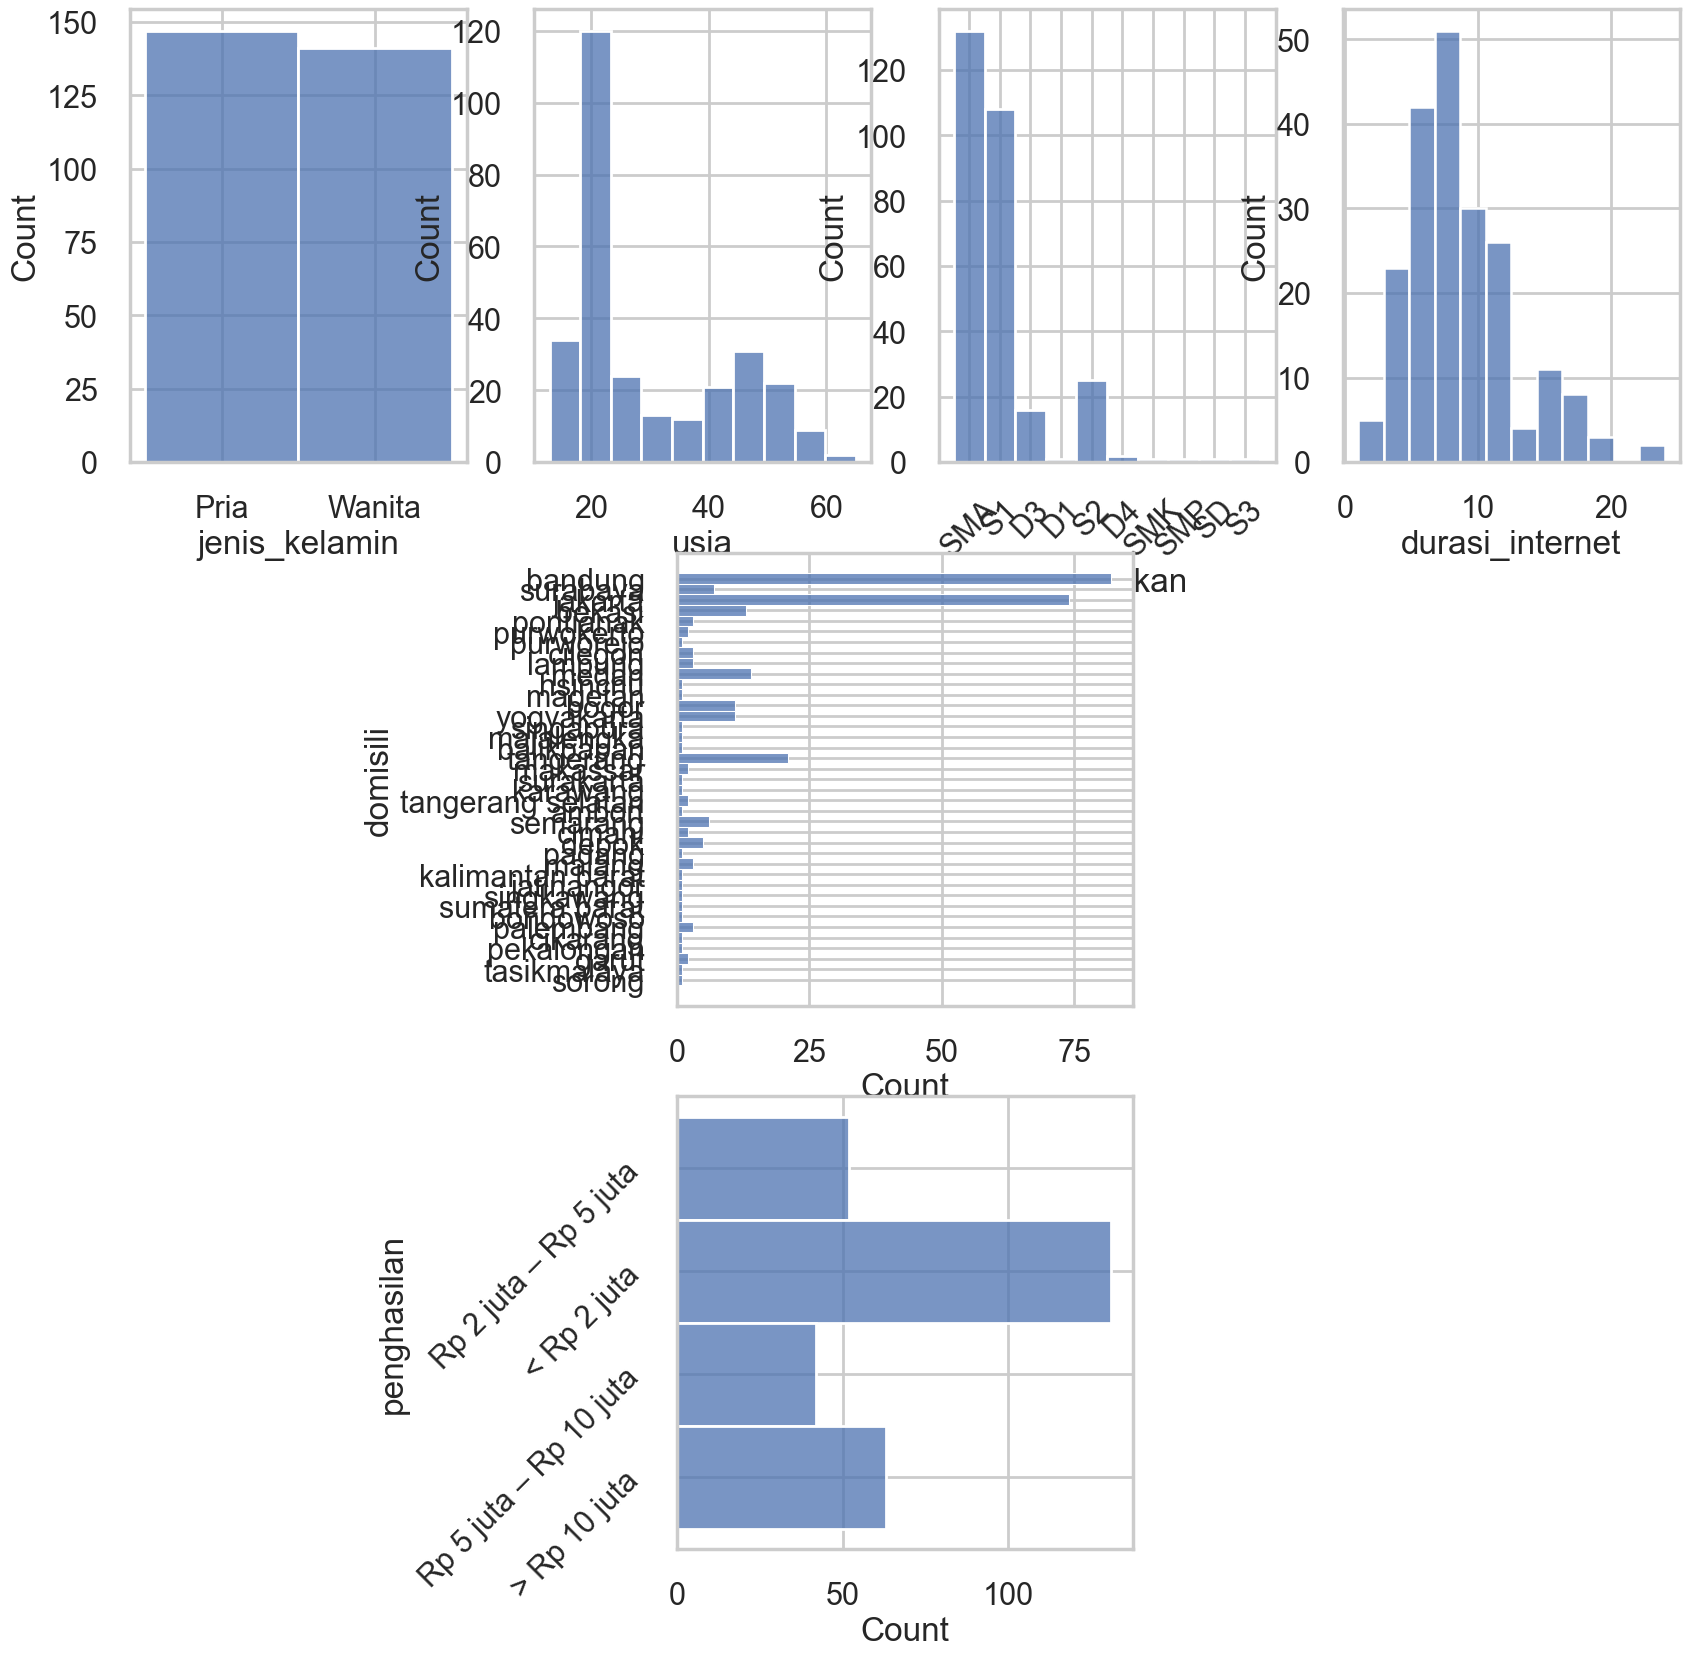

In [172]:
# fig, axs = plt.subplots(3,3,figsize=(15,15))
plt.figure(figsize=(20,20))
subplotSize = [[3,4,1], [3,4,2], [3,4,3], [3,4,4], [3,3,5], [3,3,8]]
axes = []
for i in range(len(subplotSize)):
    axes.append(plt.subplot(subplotSize[i][0], subplotSize[i][1], subplotSize[i][2]))

sns.histplot(data=df, x="jenis_kelamin", ax=axes[0])
sns.histplot(data=df, x="usia", ax=axes[1])
sns.histplot(data=df, x="pendidikan", ax=axes[2]).tick_params(axis='x', rotation=45)
sns.histplot(data=df, x="durasi_internet", ax=axes[3])

# sns.histplot(data=df, x="pekerjaan", kde=True, ax=axs[1,1])
sns.histplot(data=df, y="domisili", ax=axes[4])
sns.histplot(data=df, y="penghasilan", ax=axes[5]).tick_params(axis='y', rotation=45)

In [163]:
def create_plot_valuecount(filepath, df, column, title="", xlabel="", ylabel="", angle=0, threshold=0, otherLabel="lainnya", kind="bar", order=[], orientation="y"):

    if(kind=="bar"):
        value_count = df[column].value_counts()
        total = value_count.sum()
        newSeries = {}
        for idx, val in value_count.items():
            if(val/total < threshold/100):
                if(otherLabel in newSeries):
                    newSeries[otherLabel] += val
                else:
                    newSeries[otherLabel] = 0
            else:
                newSeries[idx] = val
        series1 = pd.Series(newSeries)
        if(order==[]):
            if(orientation=="y"):
                plt = sns.barplot(x=series1.index, y=series1.values)
            else:
                plt = sns.barplot(y=series1.index, x=series1.values)
        else:
            if(orientation=="y"):
                plt = sns.barplot(x=series1.index, y=series1.values, order=order)
            else:
                plt = sns.barplot(y=series1.index, x=series1.values, order=order)
    elif(kind=="hist"):
        if(orientation=="y"):
            plt = sns.histplot(data=df, y=column)
        else:
            plt = sns.histplot(data=df, x=column)
            

    plt.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tick_params(rotation=angle)
    
    plt.figure.savefig(filepath, bbox_inches="tight")
    plt.figure.clf()

def create_plot_multichoice(filepath, df, column_list, title="", xlabel="", ylabel="", angle=0, orientation="y"):
    value_counts = {}
    for col in column_list:
        value_count = df[col].value_counts(dropna=True) 
        key = value_count.keys().tolist()[0]
        val = value_count.tolist()[0]
        value_counts[key] = val
    value_counts_series = pd.Series(value_counts)

    if(orientation=="y"):
        plt = sns.barplot(x=value_counts_series.index, y=value_counts_series.values)
    else:
        plt = sns.barplot(y=value_counts_series.index, x=value_counts_series.values)

    plt.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tick_params(rotation=angle)

    plt.figure.savefig(filepath, bbox_inches="tight")
    plt.figure.clf()




In [164]:
# A. Demografi
demografi = ["jenis_kelamin", "usia", "pendidikan", "pekerjaan", "penghasilan", "domisili", "durasi_internet", "aktivitas_online_meningkat", "aktivitas_online_meningkat_3bln"]
demografi_title = ["Jenis Kelamin", "Usia", "Pendidikan Terakhir", "Pekerjaan", "Penghasilan", "Domisili", "Durasi Pemakaian Internet", "Aktivitas Online Terakhir", "Aktivitas Online Meningkat 3 Bulan Terakhir"]

create_plot_valuecount("../output/demografi/plot_jenis_kelamin", df, "jenis_kelamin", title="Jenis Kelamin", ylabel="Jumlah")
create_plot_valuecount("../output/demografi/plot_usia", df, "usia", title="Usia", ylabel="Jumlah", angle=45, kind="hist", orientation="y")
create_plot_valuecount("../output/demografi/plot_pendidikan", df, "pendidikan", title="Pendidikan", ylabel="Jumlah", order=["SD", "SMP", "SMK", "SMA", "D1", "D2", "D3", "S1", "S2", "S3"])
create_plot_valuecount("../output/demografi/plot_pekerjaan", df, "pekerjaan", title="Pekerjaan", ylabel="Jumlah", threshold=3, otherLabel="<3%", angle=30)
create_plot_valuecount("../output/demografi/plot_penghasilan", df, "penghasilan", title="Penghasilan", ylabel="Jumlah", angle=45, order=['< Rp 2 juta', 'Rp 2 juta – Rp 5 juta', 'Rp 5 juta – Rp 10 juta', '> Rp 10 juta'])
create_plot_valuecount("../output/demografi/plot_domisili", df, "domisili", title="Domisili", ylabel="Jumlah", threshold=3, otherLabel="<3%", angle=45)

<Figure size 1280x880 with 0 Axes>

In [165]:
# B. Bank
layanan_aktif_cols = ["layanan_aktif_1", "layanan_aktif_2", "layanan_aktif_3", "layanan_aktif_4", "layanan_aktif_5", "layanan_aktif_6"]
bank_cols = ["bank_1", "bank_2", "bank_3", "bank_4", "bank_4", "bank_6", "bank_7"]
freq_bank_cols = ["freq_atm", "freq_internet_bank", "freq_mobile_bank", "freq_sms_bank", "freq_cabang"]
fitur_disukai_cols = ["fitur_cekSaldo", "fitur_mutasi", "fitur_transfer_sesamabank", "fitur_transfer_antarbank", "fitur_pulsa", "fitur_tagihan"]
keluhan_cols = ["keluhan_1", "keluhan_2", "keluhan3", "keluhan 4"]

create_plot_multichoice("../output/bank/plot_layanan_aktif", df, layanan_aktif_cols, title="Layanan Aktif", ylabel="Jumlah", angle=30)
create_plot_multichoice("../output/bank/plot_bank", df, bank_cols, title="Bank", ylabel="Jumlah", angle=30)
create_plot_multichoice("../output/bank/plot_keluhan_bank", df, keluhan_cols, title="Keluhan Bank", xlabel="Jumlah", orientation="x")


<Figure size 1280x880 with 0 Axes>

In [166]:
# C. Emoney
emoney_pilihan_cols = ["emoney_pilihan1", "emoney_pilihan2", "emoney_pilihan3", "emoney_pilihan4", "emoney_pilihan5", "emoney_pilihan6"
        , "emoney_pilihan7", "emoney_pilihan8", "emoney_pilihan9", "emoney_pilihan10", "emoney_pilihan11"]
alasan_emoney_cols = ["alasan_emoney_1", "alasan_emoney_2", "alasan_emoney_3", "alasan_emoney_4", "alasan_money_5"]
penggunaan_emoney_cols = ["penggunaan_emoney_1", "penggunaan_emoney_2", "penggunaan_emoney_3", "penggunaan_emoney_4", "penggunaan_emoney_5"
        , "penggunaan_emoney_6", "penggunaan_emoney_7", "penggunaan_emoney_8", "penggunaan_emoney_9", "penggunaan_emoney_10"]
cara_topup_cols = ["cara_topup_emoney_1", "cara_topup_emoney_2", "cara_topup_emoney_3", "cara_topup_emoney_4", "cara_topup_emoney_5", "cara_topup_emoney_6", "cara_topup_emoney_7"]
keluhan_emoney_cols = ["keluhan_emoney_1", "keluhan_emoney_2", "keluhan_emoney_3", "keluhan_emoney_4"]
penggunaan_qr_cols = ["penggunaan_qr_1", "penggunaan_qr_2", "penggunaan_qr_3", "penggunaan_qr_4"]
lokasi_qr_cols = ["lokasi_qr_1", "lokasi_qr_2", "lokasi_qr_3", "lokasi_qr_4", "lokasi_qr_5", "lokasi_qr_6"]

create_plot_multichoice("../output/emoney/plot_emoney", df, emoney_pilihan_cols, title="E-money Pilihan", ylabel="jumlah", angle=90)
create_plot_multichoice("../output/emoney/plot_alasan_emoney", df, alasan_emoney_cols, title="Alasan Memilih E-money", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/emoney/plot_penggunaan_emoney", df, penggunaan_emoney_cols, title="Penggunaan E-Money dalam Kehidupan Sehari-hari", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/emoney/plot_cara_topup", df, cara_topup_cols, title="Cara Top-Up E-Money", xlabel="jumlah", orientation="x")

create_plot_valuecount("../output/emoney/plot_nominal_topup", df, "nominal_topup", title="Nominal Top-Up", ylabel="jumlah", orientation="x")
create_plot_valuecount("../output/emoney/plot_frekuensi_topup", df, "freq_topup", title="Frekuensi Top-Up", ylabel="jumlah", orientation="x")

create_plot_multichoice("../output/emoney/plot_keluhan_emoney", df, keluhan_emoney_cols, title="Keluhan dalam Menggunakan E-Money", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/emoney/plot_penggunaan_qr", df, penggunaan_qr_cols, title="Penggunaan QR dalam Kehidupan Sehari-hari", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/emoney/plot_lokasi_qr", df, lokasi_qr_cols, title="Lokasi Penggunaan QR", xlabel="jumlah", orientation="x")

<Figure size 1280x880 with 0 Axes>

In [183]:
# D. Belanja
belanja_online_meningkat_cols = ["belanja_online_1", "belanja_online_2", "belanja_online_3", "belanja_online_4", "belanja_online_5"
        , "belanja_online_6", "belanja_online_7", "belanja_online_8", "belanja_online_9", "belanja_online_10"]
belanja_barang_cols = ["belanja_fashion", "belanja_groceries", "belanja_hp", "belanja_laptop", "belanja_elektronik"
        , "belanja_kosmetik", "belanja_hobi", "belanja_pulsa", "belanja_makanan", "belanja_pesawat", "belanja_bioskop"]
tempat_belanja_online_cols = ["tempat_belanja_online_1", "tempat_belanja_online_2", "tempat_belanja_online_3", "tempat_belanja_online_4"
        , "tempat_belanja_online_5", "tempat_belanja_online_6", "tempat_belanja_online_7", "tempat_belanja_online_8"]
ecommerce_cols = ["ecommerce_1", "ecommerce_2", "ecommerce_3", "ecommerce_4", "ecommerce_5", "ecommerce_6"
        , "ecommerce_7", "ecommerce_8", "ecommerce_9", "ecommerce_10", "ecommerce_11", "ecommerce_12"]
alasan_belanja_offline_cols = ["alasan_offline_1", "alasan_offline_2", "alasan_offline_3", "alasan_offline_4", "alasan_offline_5", "alasan_offline_6", "alasan_offline_7"]
cara_bayar_online_cols = ["bayar_online_1", "bayar_online_2", "bayar_online_3", "bayar_online_4", "bayar_online_5", "bayar_online_6", "bayar_online_7", "bayar_online_8"]
keluhan_online_cols = ["keluhan_online_1", "keluhan_online_2", "keluhan_online_3", "keluhan_online_4", "keluhan_online_5", "keluhan_online_6"]

create_plot_valuecount("../output/belanja/plot_freq_belanja_6bln", df, "freq_belanja_6bln", title="Frekuensi Belanja 6 Bulan Terakhir", xlabel="jumlah", orientation="x")

create_plot_multichoice("../output/belanja/plot_belanja_online_meningkat", df, belanja_online_meningkat_cols, title="Belanja Online Meningkat 6 Bulan Terakhir", xlabel="jumlah", orientation="x")
# create_plot_multichoice("../output/belanja/plot_belanja_online_barang", df, belanja_barang_cols, title="Kecenderungan Barang Belanja Online", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/belanja/plot_tempat_belanja_online", df, tempat_belanja_online_cols, title="Tempat Belanja Online", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/belanja/plot_ecommerce", df, ecommerce_cols, title="Ecommerce Pilihan", xlabel="x", angle=90)

create_plot_valuecount("../output/belanja/plot_food_delivery", df, "food_delivery", title="Layanan Food Delivery yang Sering Digunakan", ylabel="jumlah", orientation="y", angle=70)

create_plot_multichoice("../output/belanja/plot_alasan_belanja_offline", df, alasan_belanja_offline_cols, title="Alasan Belanja Offline", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/belanja/plot_cara_bayar_online", df, cara_bayar_online_cols, title="Cara Bayar Online", xlabel="jumlah", orientation="x")
create_plot_multichoice("../output/belanja/plot_keluhan_online", df, keluhan_online_cols, title="Keluhan Belanja Online", xlabel="jumlah", orientation="x")

<Figure size 1280x880 with 0 Axes>